In [1]:
import pandas as pd

colnames = ["symboling","normalized_losses","make",
            "fuel_type","aspiration","num_doors",
            "body_style","drive_wheels","engine_location",
            "wheel_base","length","width","height",
            "curb_weight","engine_type","num_cylinders",
            "engine_size","fuel_system","bore","stroke",
            "compression_ratio","horsepower","peak_rpm",
            "city_mpg","highway_mpg","price"]
cars = pd.read_csv("imports-85.data", names = colnames)

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
import numpy as np
cars.replace("?",np.nan, inplace = True)

In [5]:
cars.drop(["normalized_losses","fuel_system"], axis = 1,inplace = True)
cars.dropna(subset = ["num_doors","bore","stroke",
                      "horsepower","peak_rpm","price"],
           inplace = True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
symboling            193 non-null int64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_doors            193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_cylinders        193 non-null object
engine_size          193 non-null int64
bore                 193 non-null object
stroke               193 non-null object
compression_ratio    193 non-null float64
horsepower           193 non-null object
peak_rpm             193 non-null object
city_mpg             193 non-nul

In [7]:
str_flt = ["bore","stroke","horsepower","peak_rpm","price"]

for each in str_flt:
    cars[each] = cars[each].astype(float)

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
symboling            193 non-null int64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_doors            193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_cylinders        193 non-null object
engine_size          193 non-null int64
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null float64
peak_rpm             193 non-null float64
city_mpg             193 non

In [8]:
cols = ["num_doors","num_cylinders"]
doormap = {"two":2,"four":4}
cmap = {"three":3,"four":4,"five":5,"six":6,
        "eight":8,"twelve":12}

dicts = [doormap,cmap]

for d,c in zip(dicts,cols):
    cars[c] = cars[c].map(d)
    
drop_cols = ["make","fuel_type","aspiration","body_style",
            "drive_wheels","engine_location",
            "engine_type","symboling"]
cars.drop(drop_cols, axis = 1, inplace = True)

In [9]:
carsn = cars.drop("price",axis = 1)
carsn = (carsn.max() - carsn)/carsn.max()

In [10]:
carsn["price"] = cars["price"]

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(traincol,target,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    df = df.reindex(np.random.permutation(df.index))
    point = int(0.75*len(df))
    train_df = df.iloc[0:point]
    test_df = df.iloc[point:]
    knn.fit(train_df[[traincol]],train_df[target])
    p = knn.predict(test_df[[traincol]])
    return np.sqrt(mean_squared_error(test_df[target],p))

allcols = list(carsn.drop("price",axis = 1).columns)
rmses = {}

for c in allcols:
    rmses[c] = knn_train_test(c,"price",carsn)
    
urmses5 = pd.Series(rmses)
urmses5 = urmses5.sort_values()

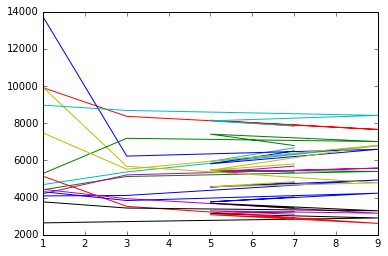

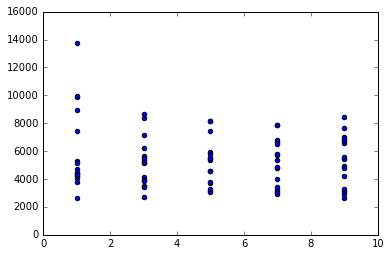

{'bore': {1: 13721.721675310788,
  3: 6231.2458536707472,
  5: 5817.407241255527,
  7: 6507.1192862636462,
  9: 6595.3097993351575},
 'city_mpg': {1: 4318.0911882687333,
  3: 3842.7941347286305,
  5: 3772.1354683834907,
  7: 4029.9498387747208,
  9: 4237.4328843335734},
 'compression_ratio': {1: 7476.1155771195099,
  3: 5525.9208251644714,
  5: 5472.3777387821438,
  7: 5810.8933616577497,
  9: 6813.0453453505634},
 'curb_weight': {1: 5147.8170546913798,
  3: 3528.5428515647645,
  5: 3077.667127775152,
  7: 2912.265704915445,
  9: 2612.1426200579681},
 'engine_size': {1: 2641.0106367967301,
  3: 2711.2989214156823,
  5: 3134.0469983322046,
  7: 3236.5321877356732,
  9: 2905.4590184835988},
 'height': {1: 9908.285467120897,
  3: 8368.4765016807978,
  5: 8159.0573734760237,
  7: 7852.2203191480494,
  9: 7662.6944138810641},
 'highway_mpg': {1: 4444.512078085163,
  3: 3941.3285773516177,
  5: 3287.996046102196,
  7: 3102.8205121757915,
  9: 3161.0655169290571},
 'horsepower': {1: 4090.7452

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(traincol,target,df,k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
    df = df.reindex(np.random.permutation(df.index))
    point = int(0.75*len(df))
    train_df = df.iloc[0:point]
    test_df = df.iloc[point:]
    knn.fit(train_df[[traincol]],train_df[target])
    p = knn.predict(test_df[[traincol]])
    return np.sqrt(mean_squared_error(test_df[target],p))

allcols = list(carsn.drop("price",axis = 1).columns)
urmsesk = {}
k = [1,3,5,7,9]

for c in allcols:
    urmsesk[c] = {}
    for n in k:
        urmsesk[c][n] = knn_train_test(c,"price",carsn,n)

for k in urmsesk:
    plt.plot(list(urmsesk[k].keys()),list(urmsesk[k].values()))

plt.show()
        
for k in urmsesk:
    plt.scatter(list(urmsesk[k].keys()),list(urmsesk[k].values()))

plt.show()
urmsesk

In [13]:
avg_feature_rmses = {}

for k,v in urmsesk.items():
    avg_feature_rmses[k] = np.mean(list(v.values()))
    
avg_feature_rmses = pd.Series(avg_feature_rmses)
avg_feature_rmses = avg_feature_rmses.sort_values()
avg_feature_rmses

engine_size          2925.669553
curb_weight          3455.687072
width                3526.234699
highway_mpg          3587.544546
city_mpg             4040.080703
horsepower           4503.402798
wheel_base           5165.222318
length               5210.956687
stroke               5896.706435
num_cylinders        5968.846903
compression_ratio    6219.670570
peak_rpm             6742.049112
bore                 7774.560771
height               8390.146815
num_doors            8410.567785
dtype: float64

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(collist,target,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    df = df.reindex(np.random.permutation(df.index))
    point = int(0.75*len(df))
    train_df = df.iloc[0:point]
    test_df = df.iloc[point:]
    knn.fit(train_df[collist],train_df[target])
    p = knn.predict(test_df[collist])
    return np.sqrt(mean_squared_error(test_df[target],p))

mrmses5 = {}

nf = [2,3,4,5]

for f in nf:
    mrmses5[f] = knn_train_test(avg_feature_rmses[:f].index,"price",
                                carsn)

mrmses5 = pd.Series(mrmses5)
mrmses5 = mrmses5.sort_values()
mrmses5

3    2311.403347
2    2430.813286
4    2532.984854
5    2906.590435
dtype: float64

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(collist,target,df,k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
    df = df.reindex(np.random.permutation(df.index))
    point = int(0.75*len(df))
    train_df = df.iloc[0:point]
    test_df = df.iloc[point:]
    knn.fit(train_df[collist],train_df[target])
    p = knn.predict(test_df[collist])
    return np.sqrt(mean_squared_error(test_df[target],p))

mrmsesk = {}
kvalues = [k+1 for k in range(25)]
nf = [3,2,4]

for f in nf:
    mrmsesk[f] = {}
    for k in kvalues:
        mrmsesk[f][k] = knn_train_test(avg_feature_rmses[:f].index,
                                       "price",carsn,k)
        
mrmsesk

{2: {1: 2558.038673895072,
  2: 2348.5545608970219,
  3: 2213.3372080123449,
  4: 2403.122628976299,
  5: 2430.8132859231305,
  6: 2339.145132938067,
  7: 2339.4270236179241,
  8: 2473.815874874404,
  9: 2582.8037807519304,
  10: 2503.9115707799497,
  11: 2562.9643377989373,
  12: 2681.7864237252984,
  13: 2817.5883199051855,
  14: 2832.9689197281664,
  15: 2965.775590429781,
  16: 3064.8786949405117,
  17: 3023.8261077048946,
  18: 3040.0251524246723,
  19: 3065.2287846016266,
  20: 3084.3636734010338,
  21: 3085.714333817742,
  22: 3127.0245502295365,
  23: 3146.3272845318565,
  24: 3157.1396436747455,
  25: 3198.3496424505038},
 3: {1: 2411.2497817945118,
  2: 1892.1595318253562,
  3: 2036.8522934435189,
  4: 2394.4997078231827,
  5: 2311.4033473813511,
  6: 2365.1442699760314,
  7: 2398.6016830963067,
  8: 2455.4453143259793,
  9: 2595.9544189810154,
  10: 2557.087692182301,
  11: 2551.6431342900942,
  12: 2706.9688055776978,
  13: 2815.8998415717051,
  14: 2854.3203410495894,
  15

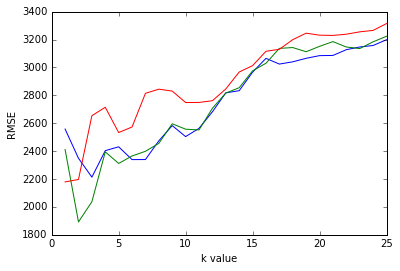

In [18]:
for k in mrmsesk:
        plt.plot(list(mrmsesk[k].keys()),list(mrmsesk[k].values()))

plt.xlabel('k value')
plt.ylabel('RMSE')

#### Takeaway:

* Feature selection and hyperparameter tuning is quite an iterative process.

Inferences...??